In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Text(14, 19, 'HAPPY BIRTHDAY PYTHON')

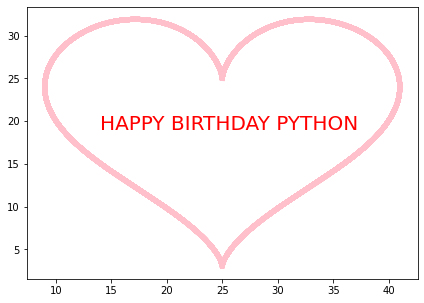

In [2]:
t=np.linspace(0,220,100000)
x=16*np.sin(t)**3+25
y=13*np.cos(t) - 5*np.cos(2*t) - 2*np.cos(3*t) - np.cos(4*t) + 20
plt.figure(figsize=(7,5))
plt.plot(x,y,color="pink",linewidth=5)
plt.text(14,19,"HAPPY BIRTHDAY PYTHON", fontsize=20,color="red")

In [3]:
data = pd.read_csv("D:/Data science/SBSI/taco/meta_df.csv")
data

,img_id,img_width,img_height,img_file,cat_id,cat_name,supercategory,ann_id,x,y,width,height,area
0,0,1537,2049,batch_1/000006.jpg,6,Glass bottle,Bottle,1,517.0000,127.0000,447.0000,1322.0,4.039540e+05
1,1,1537,2049,batch_1/000008.jpg,18,Meal carton,Carton,2,1.0000,457.0000,1429.0000,1519.0,1.071260e+06
2,1,1537,2049,batch_1/000008.jpg,14,Other carton,Carton,3,531.0000,292.0000,1006.0000,672.0,9.958350e+04
3,2,1537,2049,batch_1/000010.jpg,5,Clear plastic bottle,Bottle,4,632.0000,987.0000,500.0000,374.0,7.383250e+04
4,2,1537,2049,batch_1/000010.jpg,7,Plastic bottle cap,Bottle cap,5,632.0000,989.0000,44.0000,51.0,9.150000e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4779,1498,1824,4000,batch_9/000098.jpg,16,Drink carton,Carton,4779,228.7143,1550.0476,1007.9999,579.0,5.032469e+05
4780,1498,1824,4000,batch_9/000098.jpg,7,Plastic bottle cap,Bottle cap,4780,1041.3334,1721.7142,141.0000,138.0,1.449450e+04
4781,1499,1824,4000,batch_9/000099.jpg,39,Other plastic wrapper,Plastic bag & wrapper,4781,862.0274,1331.2500,505.9726,612.5,1.549541e+05
4782,1499,1824,4000,batch_9/000099.jpg,14,Other carton,Carton,4782,966.0000,1996.0000,211.0000,336.0,2.867500e+04


# EDA

In [4]:
sorted(data["supercategory"].unique())

['Aluminium foil',
 'Battery',
 'Blister pack',
 'Bottle',
 'Bottle cap',
 'Broken glass',
 'Can',
 'Carton',
 'Cigarette',
 'Cup',
 'Food waste',
 'Glass jar',
 'Lid',
 'Other plastic',
 'Paper',
 'Paper bag',
 'Plastic bag & wrapper',
 'Plastic container',
 'Plastic glooves',
 'Plastic utensils',
 'Pop tab',
 'Rope & strings',
 'Scrap metal',
 'Shoe',
 'Squeezable tube',
 'Straw',
 'Styrofoam piece',
 'Unlabeled litter']

In [5]:
image_path=data["img_file"]
label=data["supercategory"].to_numpy()

In [6]:
data["supercategory"].value_counts()

Plastic bag & wrapper    850
Cigarette                667
Unlabeled litter         517
Bottle                   439
Bottle cap               289
Other plastic            273
Can                      273
Carton                   251
Cup                      192
Straw                    161
Paper                    148
Broken glass             138
Styrofoam piece          112
Pop tab                   99
Lid                       87
Plastic container         72
Aluminium foil            62
Plastic utensils          37
Rope & strings            29
Paper bag                 27
Scrap metal               20
Food waste                 8
Blister pack               7
Squeezable tube            7
Shoe                       7
Glass jar                  6
Plastic glooves            4
Battery                    2
Name: supercategory, dtype: int64

In [7]:
!pip install -q pycocotools

In [8]:
%matplotlib inline
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

dataset_path = 'D:/Data science/SBSI/taco/data'
anns_file_path = dataset_path + '/' + 'annotations.json'

# Read annotations
with open(anns_file_path, 'r') as f:
    dataset = json.loads(f.read())

categories = dataset['categories']
anns = dataset['annotations']
imgs = dataset['images']
nr_cats = len(categories)
nr_annotations = len(anns)
nr_images = len(imgs)

# Load categories and super categories
cat_names = []
super_cat_names = []
super_cat_ids = {}
super_cat_last_name = ''
nr_super_cats = 0
for cat_it in categories:
    cat_names.append(cat_it['name'])
    super_cat_name = cat_it['supercategory']
    # Adding new supercat
    if super_cat_name != super_cat_last_name:
        super_cat_names.append(super_cat_name)
        super_cat_ids[super_cat_name] = nr_super_cats
        super_cat_last_name = super_cat_name
        nr_super_cats += 1

print('Number of super categories:', nr_super_cats)
print('Number of categories:', nr_cats)
print('Number of annotations:', nr_annotations)
print('Number of images:', nr_images)

Number of super categories: 28
Number of categories: 60
Number of annotations: 4784
Number of images: 1500


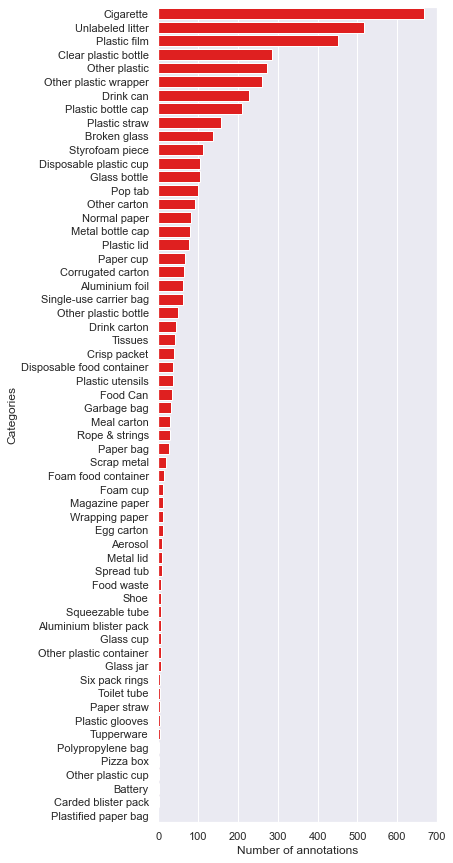

In [9]:
# Count annotations
cat_histogram = np.zeros(nr_cats,dtype=int)
for ann in anns:
    cat_histogram[ann['category_id']] += 1

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5,15))

# Convert to DataFrame
df = pd.DataFrame({'Categories': cat_names, 'Number of annotations': cat_histogram})
df = df.sort_values('Number of annotations', 0, False)

# Plot the histogram
plot_1 = sns.barplot(x="Number of annotations", y="Categories", data=df,
            label="Total", color="red")

#fig = plot_1.get_figure()
#fig.savefig("output.png")

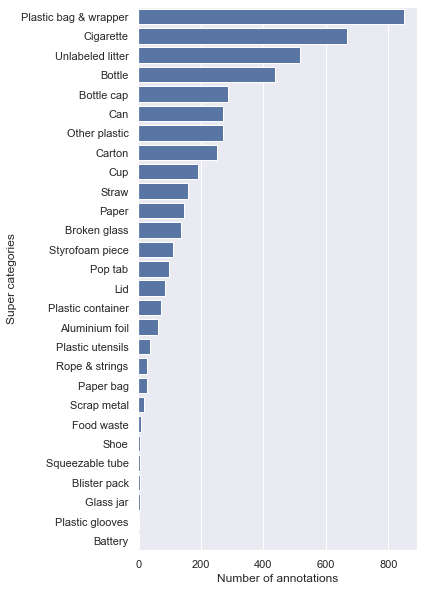

In [10]:
cat_ids_2_supercat_ids = {}
for cat in categories:
    cat_ids_2_supercat_ids[cat['id']] = super_cat_ids[cat['supercategory']]

# Count annotations
super_cat_histogram = np.zeros(nr_super_cats,dtype=int)
for ann in anns:
    cat_id = ann['category_id']
    super_cat_histogram[cat_ids_2_supercat_ids[cat_id]] +=1
    
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5,10))

# Convert to DataFrame
d ={'Super categories': super_cat_names, 'Number of annotations': super_cat_histogram}
df = pd.DataFrame(d)
df = df.sort_values('Number of annotations', 0, False)

# sns.set_color_codes("pastel")
# sns.set(style="whitegrid")
plot_1 = sns.barplot(x="Number of annotations", y="Super categories", data=df,
            label="Total", color="b")

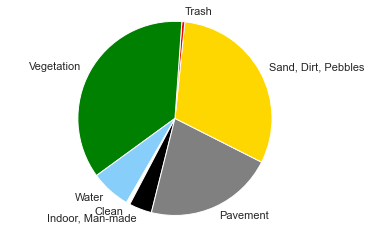

In [11]:
#background details

# Get scene cat names
scene_cats = dataset['scene_categories']
scene_name = []
for scene_cat in scene_cats:
    scene_name.append(scene_cat['name'])

nr_scenes = len(scene_cats)
scene_cat_histogram = np.zeros(nr_scenes,dtype=int)

for scene_ann in dataset['scene_annotations']:    
    scene_ann_ids = scene_ann['background_ids']
    for scene_ann_id in scene_ann_ids:
        if scene_ann_id<len(scene_cats):
            scene_cat_histogram[scene_ann_id]+=1

# Convert to DataFrame
df = pd.DataFrame({'scene_cats': scene_cats, 'nr_annotations': scene_cat_histogram})
 
# Plot
colors = ['white','black','gray', 'gold', 'red','green','lightskyblue']
plt.pie(scene_cat_histogram, labels=scene_name, colors = colors,
      shadow=False, startangle=-120)
 
plt.axis('equal')
plt.show()

In [12]:
#Visualize dataset graph

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!
batch_9/000098.jpg


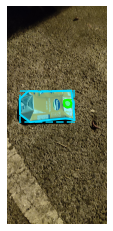

In [13]:
from PIL import Image, ExifTags
from pycocotools.coco import COCO
from matplotlib.patches import Polygon, Rectangle
from matplotlib.collections import PatchCollection
import colorsys
import random
import pylab

# User settings
image_filepath = 'batch_9/000098.jpg'
#pylab.rcParams['figure.figsize'] = (28,28)
####################

# Obtain Exif orientation tag code
for orientation in ExifTags.TAGS.keys():
    if ExifTags.TAGS[orientation] == 'Orientation':
        break

# Loads dataset as a coco object
coco = COCO(anns_file_path)

# Find image id
img_id = -1
for img in imgs:
    if img['file_name'] == image_filepath:
        img_id = img['id']
        break

# Show image and corresponding annotations
if img_id == -1:
    print('Incorrect file name')
else:

    # Load image
    print(image_filepath)
    I = Image.open(dataset_path + '/' + image_filepath)

    # Load and process image metadata
    if I._getexif():
        exif = dict(I._getexif().items())
        # Rotate portrait and upside down images if necessary
        if orientation in exif:
            if exif[orientation] == 3:
                I = I.rotate(180,expand=True)
            if exif[orientation] == 6:
                I = I.rotate(270,expand=True)
            if exif[orientation] == 8:
                I = I.rotate(90,expand=True)

    # Show image
    fig,ax = plt.subplots(1)
    plt.axis('off')
    plt.imshow(I)

    # Load mask ids
    annIds = coco.getAnnIds(imgIds=img_id, catIds=[], iscrowd=None)
    anns_sel = coco.loadAnns(annIds)

    # Show annotations
    for ann in anns_sel:
        color = colorsys.hsv_to_rgb(np.random.random(),1,1)
        for seg in ann['segmentation']:
            poly = Polygon(np.array(seg).reshape((int(len(seg)/2), 2)))
            p = PatchCollection([poly], facecolor=color, edgecolors=color,linewidths=0, alpha=0.4)
            ax.add_collection(p)
            p = PatchCollection([poly], facecolor='none', edgecolors=color, linewidths=2)
            ax.add_collection(p)
        [x, y, w, h] = ann['bbox']
        rect = Rectangle((x,y),w,h,linewidth=2,edgecolor=color,
                         facecolor='none', alpha=0.7, linestyle = '--')
        ax.add_patch(rect)

    plt.show()

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
Number of images found:  43


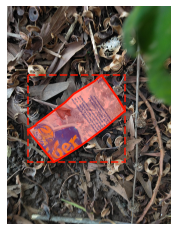

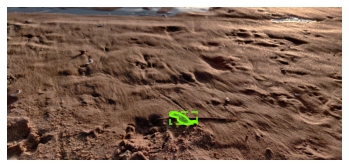

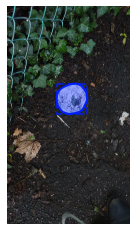

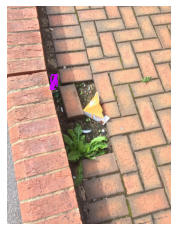

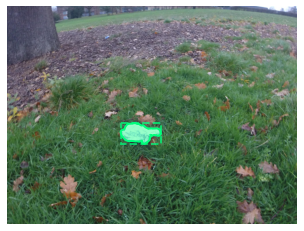

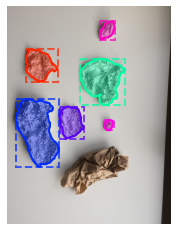

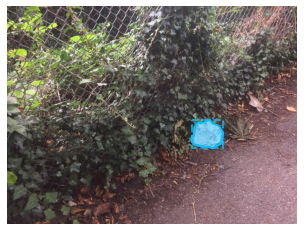

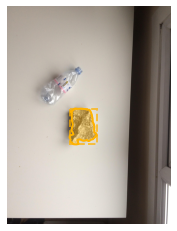

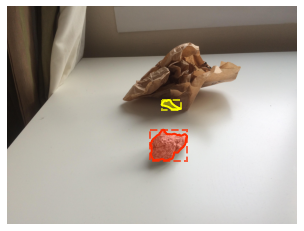

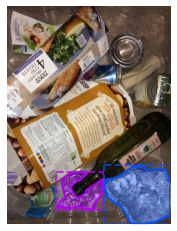

In [14]:
from PIL import Image, ExifTags
from pycocotools.coco import COCO
from matplotlib.patches import Polygon, Rectangle
from matplotlib.collections import PatchCollection
import colorsys
import random
import pylab

# User settings
nr_img_2_display = 10
category_name = 'Aluminium foil'#  --- Insert the name of one of the categories or super-categories above
####################

# Obtain Exif orientation tag code
for orientation in ExifTags.TAGS.keys():
    if ExifTags.TAGS[orientation] == 'Orientation':
        break

# Loads dataset as a coco object
coco = COCO(anns_file_path)

# Get image ids
imgIds = []
catIds = coco.getCatIds(catNms=[category_name])
if catIds:
    # Get all images containing an instance of the chosen category
    imgIds = coco.getImgIds(catIds=catIds)
else:
    # Get all images containing an instance of the chosen super category
    catIds = coco.getCatIds(supNms=[category_name])
    for catId in catIds:
        imgIds += (coco.getImgIds(catIds=catId))
    imgIds = list(set(imgIds))

nr_images_found = len(imgIds) 
print('Number of images found: ',nr_images_found)

# Select N random images
random.shuffle(imgIds)
imgs = coco.loadImgs(imgIds[0:min(nr_img_2_display,nr_images_found)])

for img in imgs:
    image_path = dataset_path + '/' + img['file_name']
    # Load image
    I = Image.open(image_path)
    
    # Load and process image metadata
    if I._getexif():
        exif = dict(I._getexif().items())
        # Rotate portrait and upside down images if necessary
        if orientation in exif:
            if exif[orientation] == 3:
                I = I.rotate(180,expand=True)
            if exif[orientation] == 6:
                I = I.rotate(270,expand=True)
            if exif[orientation] == 8:
                I = I.rotate(90,expand=True)
    
    # Show image
    fig,ax = plt.subplots(1)
    plt.axis('off')
    plt.imshow(I)

    # Load mask ids
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns_sel = coco.loadAnns(annIds)
    
    # Show annotations
    for ann in anns_sel:
        color = colorsys.hsv_to_rgb(np.random.random(),1,1)
        for seg in ann['segmentation']:
            poly = Polygon(np.array(seg).reshape((int(len(seg)/2), 2)))
            p = PatchCollection([poly], facecolor=color, edgecolors=color,linewidths=0, alpha=0.4)
            ax.add_collection(p)
            p = PatchCollection([poly], facecolor='none', edgecolors=color, linewidths=2)
            ax.add_collection(p)
        [x, y, w, h] = ann['bbox']
        rect = Rectangle((x,y),w,h,linewidth=2,edgecolor=color,
                         facecolor='none', alpha=0.7, linestyle = '--')
        ax.add_patch(rect)

    plt.show()